In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
DATASET_PATH = r"C:\Users\ancha\Downloads\PRCP-1001-RiceLeaf\Data"

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

In [3]:
class_counts = {}

for folder in os.listdir(DATASET_PATH):
    folder_path = os.path.join(DATASET_PATH, folder)
    class_counts[folder] = len(os.listdir(folder_path))

pd.DataFrame(class_counts.items(), columns=["Class", "Image Count"])

,Class,Image Count
0,Bacterial_leaf_blight,40
1,Brown_spot,40
2,Leaf_smut,39


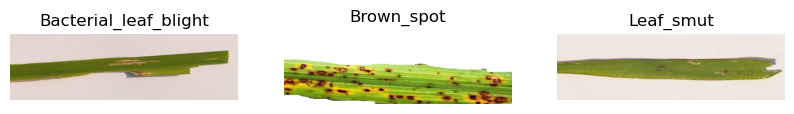

In [7]:
plt.figure(figsize=(10,4))
i = 1

for folder in os.listdir(DATASET_PATH):
    img_path = os.path.join(DATASET_PATH, folder, os.listdir(os.path.join(DATASET_PATH, folder))[0])
    img = plt.imread(img_path)
    
    plt.subplot(1,3,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis("off")
    i += 1

plt.show()

In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model

<Sequential name=sequential_2, built=True>

In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)

C:\Users\ancha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3793 - loss: 1.3885 - val_accuracy: 0.3478 - val_loss: 1.1210
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 872ms/step - accuracy: 0.3676 - loss: 1.1344 - val_accuracy: 0.3478 - val_loss: 1.0867
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 850ms/step - accuracy: 0.3647 - loss: 1.0919 - val_accuracy: 0.5217 - val_loss: 1.0779
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 859ms/step - accuracy: 0.4865 - loss: 1.0518 - val_accuracy: 0.6087 - val_loss: 1.0640
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 879ms/step - accuracy: 0.4568 - loss: 1.0525 - val_accuracy: 0.6087 - val_loss: 1.0518
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 887ms/step - accuracy: 0.5256 - loss: 1.0292 - val_accuracy: 0.4783 - val_loss: 1.0416
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 947ms/step - accuracy: 0.5631 - loss: 0.9690 - val_accuracy: 0.3913 - val_loss: 1.0238
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 906ms/step - accuracy: 0.4952 - loss: 1.0260 - val_accuracy: 0.3913 - val_loss: 1

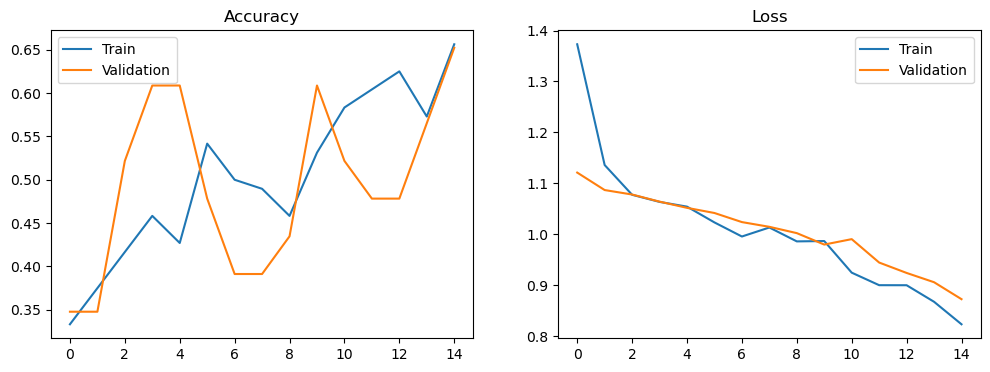

In [21]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()

plt.show()

In [23]:
aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_aug = aug_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_aug = aug_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [25]:
history_aug = model.fit(
    train_aug,
    validation_data=val_aug,
    epochs=15
)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5545 - loss: 0.9713 - val_accuracy: 0.6087 - val_loss: 0.9259
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5793 - loss: 0.9661 - val_accuracy: 0.6087 - val_loss: 0.8980
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5875 - loss: 0.9002 - val_accuracy: 0.6957 - val_loss: 0.8702
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5866 - loss: 0.8926 - val_accuracy: 0.5217 - val_loss: 0.9038
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5951 - loss: 0.8685 - val_accuracy: 0.6087 - val_loss: 0.8881
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5765 - loss: 0.9090 - val_accuracy: 0.6522 - val_loss: 0.8444
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6186 - loss: 0.8930 - val_accuracy: 0.6522 - val_loss: 0.9206
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7037 - loss: 0.8471 - val_accuracy: 0.6522 - val_loss: 0.9018
Epoch 9/15
6/6 ━

In [27]:
base_model = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [31]:
tl_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")
])

tl_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
tl_model

<Sequential name=sequential_4, built=True>

In [33]:
history_tl = tl_model.fit(
    train_aug,
    validation_data=val_aug,
    epochs=10
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.3493 - loss: 1.4452 - val_accuracy: 0.3478 - val_loss: 1.1907
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3539 - loss: 1.2929 - val_accuracy: 0.6957 - val_loss: 0.8450
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5289 - loss: 0.9576 - val_accuracy: 0.8261 - val_loss: 0.7043
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6359 - loss: 0.7675 - val_accuracy: 0.7391 - val_loss: 0.8076
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6007 - loss: 0.8514 - val_accuracy: 0.6522 - val_loss: 0.6870
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6329 - loss: 0.8412 - val_accuracy: 0.7391 - val_loss: 0.7239
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7067 - loss: 0.7239 - val_accuracy: 0.7826 - val_loss: 0.6874
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7759 - loss: 0.6480 - val_accuracy: 0.8261 - val_loss: 0.5626
Epoch 9/

In [35]:
comparison = pd.DataFrame({
    "Model": ["CNN", "CNN + Augmentation", "VGG16 Transfer Learning"],
    "Best Validation Accuracy": [
        max(history.history['val_accuracy']),
        max(history_aug.history['val_accuracy']),
        max(history_tl.history['val_accuracy'])
    ]
})

comparison

,Model,Best Validation Accuracy
0,CNN,0.652174
1,CNN + Augmentation,0.695652
2,VGG16 Transfer Learning,0.826087


In [42]:
from tensorflow.keras.models import load_model

model = load_model("rice_leaf_disease_model.keras")
model.summary()

C:\Users\ancha\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,138,248 (80.64 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 3,211,781 (12.25 MB)

## - Small dataset (120 images)
- Risk of overfitting
- Visual similarity between diseases